In [28]:
import networkx as nx
import json
import powerlaw
import numpy as np
import matplotlib.pyplot as plt


def test(keywords):

    # Load the GML graph
    gml_filename = f"{keywords}.gml"
    G = nx.read_gml(gml_filename, label='id')

    # Relabel the nodes with numbers from 0 to the number of nodes
    G = nx.convert_node_labels_to_integers(G, label_attribute='original_label')

    # Save the NetworkX graph as an edge list
    edgelist_filename = f"{keywords}.edgelist"
    nx.write_edgelist(G, edgelist_filename, data=False)

  
    #  Extract and save the 'gt' attribute as a list in a separate file
    gt_list = [G.nodes[node]['gt'] for node in G.nodes()]
    membership_filename = f"{keywords}_pre.membership"
    with open(membership_filename, 'w') as f:
        json.dump(gt_list, f)


    print("Graph transformation and file saving completed. The first step is done!!!")




    # Calculate the degree sequence
    degree_sequence = [degree for node, degree in G.degree()]
    # Create a log-log plot of the degree sequence
    plt.loglog(sorted(degree_sequence, reverse=True), marker='o', linestyle='none')
    plt.title("Degree Sequence (Log-Log)")

    plt.grid(True)
    plt.show()
    print("Graph degree sequence plot completed. The second step is done!!!")


    
    
    # Input Community Structure
    with open(f"{keywords}_pre.membership", "r") as file:
        # Read the entire contents of the file into a string
        file_contents = file.read()

    # Remove square brackets and split the string into individual items
    items = file_contents.strip('[]').split(', ')

    # Create a list with each item enclosed in double quotes
    membership_list = [int(item.strip('"')) for item in items]
    print(max(membership_list)+1,len(set(membership_list)))
    with open(f"{keywords}.membership", "w") as file:
        for item in membership_list:
            file.write(str(item) + "\n")
    
    from collections import Counter

    frequency_sequence = Counter(membership_list)

    plt.loglog(sorted(list(frequency_sequence.values()), reverse=True), marker='o', linestyle='none')
    plt.title("Community Size Sequence (Log-Log)")
 
    plt.grid(True)
    plt.show()
    print("Graph Community Size plot completed. The third step is done!!!")


    print("Now we test degree sequence:")

    data = degree_sequence

    #  Fit a power-law model to your data
    fit = powerlaw.Fit(data)

    # Plot the PDF and CCDF of the data and fitted power-law model
    figPDF = fit.plot_pdf(color='b', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=figPDF)

    figCCDF = fit.plot_ccdf(color='r', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)

    # Examine the results and perform a goodness-of-fit test
    alpha = fit.power_law.alpha
    result = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

    print(f"Estimated alpha: {alpha}")
    print(f"Power Law and Exponential Law Distributions Compare: {result[0]}")

    plt.show()
    print("Graph degree sequence test completed. The fourth step is done!!!")

    
    print("Now we test community sizes:")

    data = list(frequency_sequence.values())

    # Fit a power-law model to your data
    fit = powerlaw.Fit(data)

    # Plot the PDF and CCDF of the data and fitted power-law model
    figPDF = fit.plot_pdf(color='b', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=figPDF)

    figCCDF = fit.plot_ccdf(color='r', marker='o', linestyle='-', linewidth=2)
    fit.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF)

    # Examine the results and perform a goodness-of-fit test
    alpha = fit.power_law.alpha
    result = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

    print(f"Estimated alpha: {alpha}")
    print(f"Power Law and Exponential Law Distributions Compare: {result[0]}")


    plt.show()
    print("Graph community size test completed. The fifth step is done!!!")

Graph transformation and file saving completed. The first step is done!!!


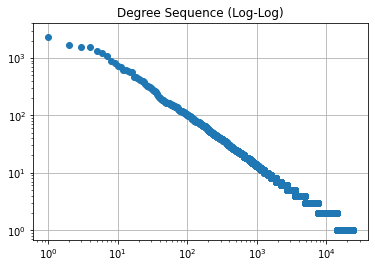

Graph degree sequence plot completed. The second step is done!!!
176 176


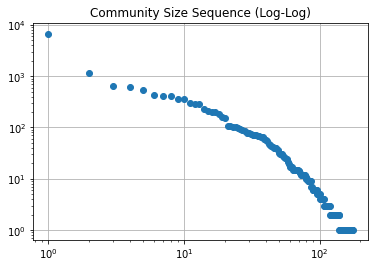

Graph Community Size plot completed. The third step is done!!!
Now we test degree sequence:
Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 00%
xmin progress: 01%
xmin progress: 01%
xmin progress: 02%
xmin progress: 02%
xmin progress: 03%
xmin progress: 03%
xmin progress: 04%
xmin progress: 05%
xmin progress: 05%
xmin progress: 06%
xmin progress: 06%
xmin progress: 07%
xmin progress: 07%
xmin progress: 08%
xmin progress: 08%
xmin progress: 09%
xmin progress: 10%
xmin progress: 10%
xmin progress: 11%
xmin progress: 11%
xmin progress: 12%
xmin progress: 12%
xmin progress: 13%
xmin progress: 13%
xmin progress: 14%
xmin progress: 15%
xmin progress: 15%
xmin progress: 16%
xmin progress: 16%
xmin progress: 17%
xmin progress: 17%
xmin progress: 18%
xmin progress: 18%
xmin progress: 19%
xmin progress: 20%
xmin progress: 20%
xmin progress: 21%
xmin progress: 21%
xmin progress: 22%
xmin progress: 22%
xmin progress: 23%
xmin progress: 23%
xmin progress: 24%
xmin

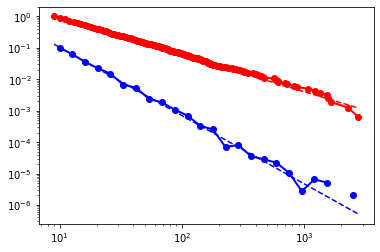

Graph degree sequence test completed. The fourth step is done!!!
Now we test community sizes:
Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 01%
xmin progress: 03%
xmin progress: 04%
xmin progress: 06%
xmin progress: 07%
xmin progress: 09%
xmin progress: 10%
xmin progress: 12%
xmin progress: 13%
xmin progress: 15%
xmin progress: 16%
xmin progress: 18%
xmin progress: 19%
xmin progress: 21%
xmin progress: 22%
xmin progress: 24%
xmin progress: 25%
xmin progress: 27%
xmin progress: 28%
xmin progress: 30%
xmin progress: 31%
xmin progress: 33%
xmin progress: 34%
xmin progress: 36%
xmin progress: 37%
xmin progress: 39%
xmin progress: 40%
xmin progress: 42%
xmin progress: 43%
xmin progress: 45%
xmin progress: 46%
xmin progress: 48%
xmin progress: 50%
xmin progress: 51%
xmin progress: 53%
xmin progress: 54%
xmin progress: 56%
xmin progress: 57%
xmin progress: 59%
xmin progress: 60%
xmin progress: 62%
xmin progress: 63%
xmin progress: 65%
xmin progress: 66%
xm

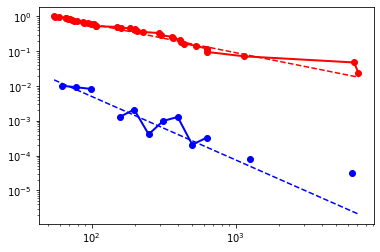

Graph community size test completed. The fifth step is done!!!


In [29]:
test("as")

Graph transformation and file saving completed. The first step is done!!!


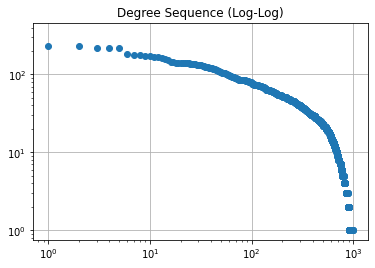

Graph degree sequence plot completed. The second step is done!!!
42 42


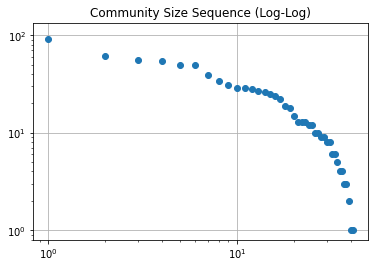

Graph Community Size plot completed. The third step is done!!!
Now we test degree sequence:
Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 00%
xmin progress: 01%
xmin progress: 02%
xmin progress: 02%
xmin progress: 03%
xmin progress: 04%
xmin progress: 04%
xmin progress: 05%
xmin progress: 06%
xmin progress: 07%
xmin progress: 07%
xmin progress: 08%
xmin progress: 09%
xmin progress: 09%
xmin progress: 10%
xmin progress: 11%
xmin progress: 11%
xmin progress: 12%
xmin progress: 13%
xmin progress: 14%
xmin progress: 14%
xmin progress: 15%
xmin progress: 16%
xmin progress: 16%
xmin progress: 17%
xmin progress: 18%
xmin progress: 19%
xmin progress: 19%
xmin progress: 20%
xmin progress: 21%
xmin progress: 21%
xmin progress: 22%
xmin progress: 23%
xmin progress: 23%
xmin progress: 24%
xmin progress: 25%
xmin progress: 26%
xmin progress: 26%
xmin progress: 27%
xmin progress: 28%
xmin progress: 28%
xmin progress: 29%
xmin progress: 30%
xmin progress: 30%
xmin

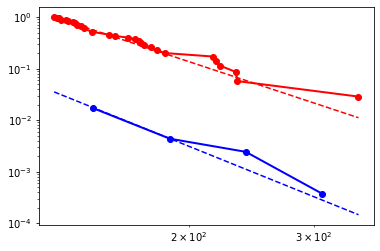

Graph degree sequence test completed. The fourth step is done!!!
Now we test community sizes:
Calculating best minimal value for power law fit
xmin progress: 00%
xmin progress: 03%
xmin progress: 06%
xmin progress: 10%
xmin progress: 13%
xmin progress: 17%
xmin progress: 20%
xmin progress: 24%
xmin progress: 27%
xmin progress: 31%
xmin progress: 34%
xmin progress: 37%
xmin progress: 41%
xmin progress: 44%
xmin progress: 48%
xmin progress: 51%
xmin progress: 55%
xmin progress: 58%
xmin progress: 62%
xmin progress: 65%
xmin progress: 68%
xmin progress: 72%
xmin progress: 75%
xmin progress: 79%
xmin progress: 82%
xmin progress: 86%
xmin progress: 89%
xmin progress: 93%
xmin progress: 96%
Estimated alpha: 2.7642482230327046
Power Law and Exponential Law Distributions Compare: -0.3324519041620192


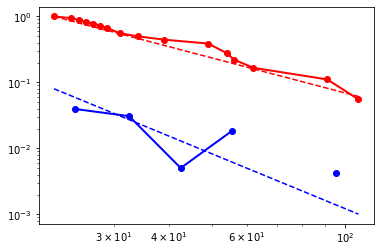

Graph community size test completed. The fifth step is done!!!


In [30]:
test("eu-core")